In [1]:
!pip install torch

In [2]:
import torch
import numpy as np

# Basics

In [3]:
# Create tensor from List

data = [[1,2],[3,4]]
tensors = torch.tensor(data)

In [4]:
tensors

tensor([[1, 2],
        [3, 4]])

In [5]:
# Create tensor from Numpy

np_array = np.arange(10)
tensor_np = torch.from_numpy(np_array)

In [6]:
tensor_np

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
tensor_np.shape

torch.Size([10])

In [8]:
tensor_np.ndim

1

In [9]:
tensor_np.dtype

torch.int64

# Tensor Operations

In [10]:
ten1 = torch.tensor([1,2,3])
ten2 = torch.tensor([4,5,6])
ten1 + ten2

tensor([5, 7, 9])

In [12]:
torch.add(ten1, ten2)   #another way to add

tensor([5, 7, 9])

In [13]:
torch.sub(ten2, ten1)

tensor([3, 3, 3])

In [14]:
torch.subtract(ten2, ten1)

tensor([3, 3, 3])

In [15]:
ten1*10

tensor([10, 20, 30])

**Matrix Multiplication**


Rules of Matrix Multiplication:

(3,2) * (3,2) = Error

(4,3) * (3,2) = (4,2)

(2,2) * (2,5) = (2,5)

In [20]:
matrix4_3 = torch.tensor([[1,2,3],
[4,5,6],
[7,8,9],
[10,11,12]])


In [21]:
matrix4_3.shape

torch.Size([4, 3])

In [22]:
matrix3_2 = torch.tensor([[1,2],
[3,4],
[5,6]])

In [23]:
matrix3_2.shape

torch.Size([3, 2])

In [25]:
result = torch.matmul(matrix4_3, matrix3_2)   #=> Result will be (4,2)

In [26]:
result

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [27]:
result.shape

torch.Size([4, 2])

In [28]:
# You can also use torch.mm() which is a short for torch.matmul()

torch.mm(matrix4_3, matrix3_2)

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [29]:
matrix4_3

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [30]:
# Transpose
matrix4_3.T

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

In [31]:
# OR

torch.t(matrix4_3)

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

#Some PyTorch Operations

In [32]:
# Zeros

tensorZeroes = torch.zeros((3,2))
tensorZeroes

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [33]:
# Ones

tensorOnes = torch.ones((3,2))
tensorOnes

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [35]:
# Random: but include negative tensor
tensorRandomN = torch.randn((3,2))
tensorRandomN

tensor([[ 0.2742,  0.0239],
        [-0.8244,  0.9877],
        [-0.6233,  0.2078]])

In [36]:
# Random: but only +ve tensor
tensorRandom = torch.rand((3,2))
tensorRandom

tensor([[0.7899, 0.6967],
        [0.5560, 0.7296],
        [0.6986, 0.4421]])

In [38]:
customFill = torch.full((3,2), 0.001)
customFill

tensor([[0.0010, 0.0010],
        [0.0010, 0.0010],
        [0.0010, 0.0010]])

# Quickstart


The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [39]:
!pip install torchvision --no-deps

In [40]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn

In [41]:
# Download the training data from open dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 19782667.76it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 310427.80it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5521138.26it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4899540.96it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [43]:
# Download the testing data from open dataset
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(),
)

In [44]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

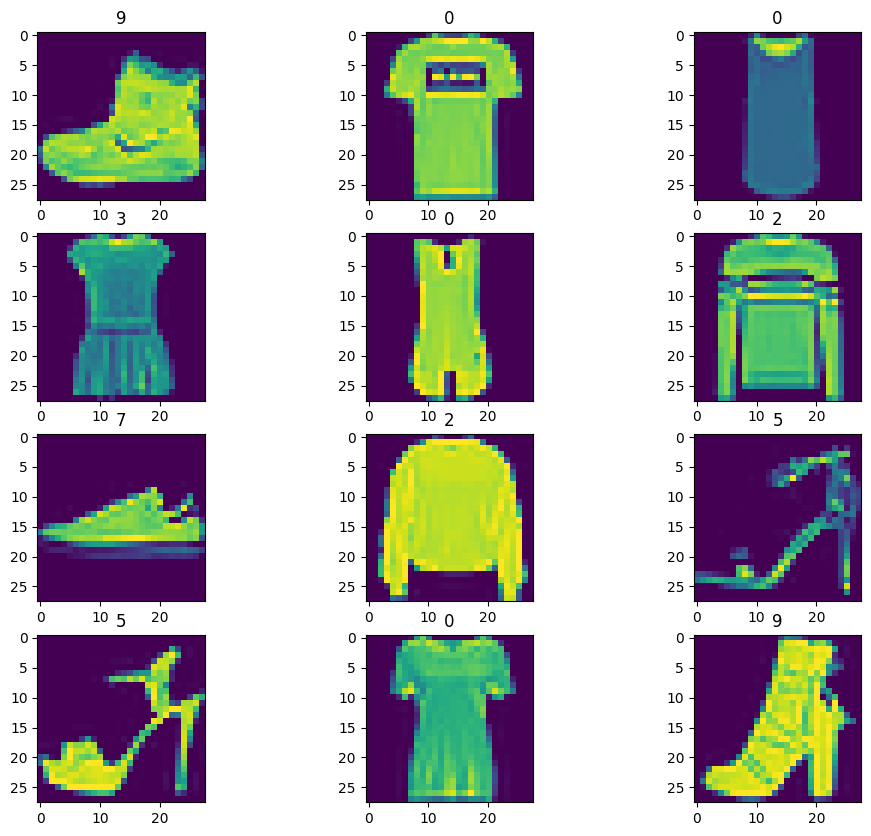

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
for i in range(12):
  plt.subplot(4,3,i+1)
  sample_image, sample_label = training_data[i]
  plt.imshow(sample_image[0])
  plt.title(sample_label)

Dataloader wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [50]:
batch_size = 64

training = DataLoader(training_data, batch_size = batch_size)
testing = DataLoader(test_data, batch_size = batch_size)


for X, y in testing:
  print(f"Shape of X: {X.shape}")
  print(f"Shape of y: {y.shape}")
  break

Shape of X: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


In [51]:
for X, y in training:
  print(torch.max(X))
  print(torch.min(X))
  break

tensor(1.)
tensor(0.)


We need not to scale as DataLoader will take care of it

## Model Building

Define a neural network class by subclassing nn.Module, and initialize the neural network layers in __ init __. Every nn.Module subclass implements the operations on input data in the forward method.

In [53]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.build_model = nn.Sequential(
        nn.Linear(28*28, 512),  #28*28 is the input shape
        nn.ReLU(),
        nn.Linear(512, 512), #hidden layer
        nn.ReLU(),
        nn.Linear(512, 10)  #output Layer

        # We have 10 types of clothes in FashionMNIST dataset.
    )

  def forward(self, x):
    x = self.flatten(x)
    dnn = self.build_model(x)
    return dnn

In [54]:
model = NeuralNetwork()

In [55]:
# Compile model- Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [61]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  # Compute Prediction error
  for batch, (X,y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    """
    This line clears (zeros out) the gradients of the model's parameters. Gradients are accumulated during the forward and backward passes and need to be cleared before
    the next backward pass.
    """
    loss.backward()
    """
    This computes the gradients of the loss with respect to the model's parameters. This is a crucial step for gradient-based optimization algorithms like
    stochastic gradient descent (SGD).
    """
    optimizer.step()

    if batch%100 == 0:    # if batch_no. is a multiple of 100
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [59]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  model.eval()
  test_loss, correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()    # .item() method is used to extract a single scalar value from a tensor.
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [62]:
for epoch in range(5):
  print(f"Epochs {epoch+1}")
  train(training, model, loss_fn, optimizer)
  test(testing, model, loss_fn)

Epochs 1
loss: 2.302042 [    0/60000]
loss: 2.195549 [ 6400/60000]
loss: 1.940825 [12800/60000]
loss: 1.770212 [19200/60000]
loss: 1.380052 [25600/60000]
loss: 1.254082 [32000/60000]
loss: 1.160040 [38400/60000]
loss: 1.029555 [44800/60000]
loss: 0.996884 [51200/60000]
loss: 0.911247 [57600/60000]
Test Error: 
 Accuracy: 67.9%, Avg loss: 0.905793 

Epochs 2
loss: 0.927405 [    0/60000]
loss: 0.961559 [ 6400/60000]
loss: 0.716773 [12800/60000]
loss: 0.913766 [19200/60000]
loss: 0.736897 [25600/60000]
loss: 0.740932 [32000/60000]
loss: 0.780886 [38400/60000]
loss: 0.746360 [44800/60000]
loss: 0.736385 [51200/60000]
loss: 0.719732 [57600/60000]
Test Error: 
 Accuracy: 75.5%, Avg loss: 0.699999 

Epochs 3
loss: 0.664280 [    0/60000]
loss: 0.757819 [ 6400/60000]
loss: 0.528758 [12800/60000]
loss: 0.770497 [19200/60000]
loss: 0.629536 [25600/60000]
loss: 0.629850 [32000/60000]
loss: 0.653270 [38400/60000]
loss: 0.682373 [44800/60000]
loss: 0.657017 [51200/60000]
loss: 0.632512 [57600/60000]